In [30]:
#Projeto de mineração de defeitos para identificação de áreas criticas de um sistema
#No projeto, será utilizado o LangChain, framework de Python que é amplamente utilizado para manipular dados textuais utilizando LLMS

In [31]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
# Carregar os dados
df = pd.read_csv("C:/Users/pedro/OneDrive/Documentos/basesdedefeitos/jirabugs.csv")

In [33]:
# Verificar as primeiras linhas para entender o formato dos dados
df.head(10)
# Verificar as últimas linhas para entender o formato dos dados
df.tail(10)

,Issue Type,Key,Summary,Status,Created,Linked Issues,Development,Epic Link,Reporter,Epic Name,Sprint
1035,Bug,BR-210,Instanciar ONU - O Sistema permite instanciar ...,Done,11/7/2018 13:06:17,NaN,{},NaN,Bruno Sabóia,NaN,NaN
1036,Bug,BR-209,Instanciar ONU - Campo Fabricante está habili...,Done,11/7/2018 12:56:48,NaN,{},NaN,Bruno Sabóia,NaN,BR Sprint 3
1037,Bug,BR-208,Instanciar ONU - Sistema não bloqueia outras ...,Done,11/7/2018 12:51:50,NaN,{},NaN,Bruno Sabóia,NaN,BR Sprint 2
1038,Bug,BR-207,Exploratório - Layout - Label dos ícones no ma...,Done,11/7/2018 12:41:38,NaN,{},NaN,Bruno Sabóia,NaN,NaN
1039,Bug,BR-206,Instanciar ONU - Campo CTO relacionada não é m...,Done,11/7/2018 12:28:26,NaN,{},NaN,Bruno Sabóia,NaN,BR Sprint 3
1040,Bug,BR-205,Menu não exibe apenas logotipos quando fica co...,Done,11/7/2018 12:27:38,NaN,{},NaN,Rute Castro,NaN,NaN
1041,Bug,BR-204,Instanciar ONU - Instanciar ONU via campos End...,Done,11/7/2018 12:23:17,NaN,{},NaN,Bruno Sabóia,NaN,BR Sprint 3
1042,Bug,BR-203,Instanciar CTO - O Sistema permite instanciar ...,Done,11/7/2018 12:21:34,NaN,{},NaN,Ismayle Santos,NaN,NaN
1043,Bug,BR-202,Instanciar ONU - Campo GPON Serial Number não ...,Done,11/7/2018 12:16:30,NaN,{},NaN,Bruno Sabóia,NaN,BR Sprint 2
1044,Bug,BR-201,Instanciar ONU - Sistema permite editar campos...,Done,11/7/2018 12:02:35,NaN,{},NaN,Bruno Sabóia,NaN,BR Sprint 3;BR Sprint 2


In [34]:
# Definir os tipos de dados da coluna 'created' como datas
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')

In [35]:
# Checar se existem linhas duplicadas
duplicate_rows = df.duplicated()

In [36]:
# Print the number of duplicate rows
print(f'Numero de linhas duplicadas: {duplicate_rows.sum()}')

Numero de linhas duplicadas: 0


In [37]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

In [38]:
# Optionally, you can check the shape of the cleaned DataFrame
print(f'Formato do dataframe depois de remover duplicatas: {df_cleaned.shape}')

Formato do dataframe depois de remover duplicatas: (1045, 11)


In [39]:
# Iterar cada coluna do dataframe e padronizar a formatação das strings passando para letras minusculas
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.strip().str.lower()

In [40]:
# Definir celulas não preenchidas como 'missing' para maior organização
df.fillna('NULL')

,Issue Type,Key,Summary,Status,Created,Linked Issues,Development,Epic Link,Reporter,Epic Name,Sprint
0,dev bug,br-3054,[dev] análise do impacto da adição de ssl no m...,to do,2021-08-30 13:01:20,NULL,{},NULL,érica miranda de sousa,NULL,NULL
1,dev bug,br-3046,[v1.6.0-sp35.3] comportamento da pesquisa pelo...,to do,2021-08-25 03:22:21,NULL,{},br-897,bruno sabóia,NULL,br sprint 37
2,dev bug,br-3042,"[v1.6.0-sp35.3] sistema exibe mensagem ""erro d...",to do,2021-08-24 21:33:20,br-2335,{},br-562,érica miranda de sousa,NULL,br sprint 36
3,dev bug,br-3041,[v1.6.0-sp35.3] ao rodar script de atualização...,in progress,2021-08-24 20:14:00,br-2946,{},NULL,érica miranda de sousa,NULL,br sprint 36
4,dev bug,br-3027,[v1.6.0-sp35.1] sistema permite que um usuário...,to do,2021-08-16 10:00:32,br-2335,{},br-2908,bruno sabóia,NULL,br sprint 36
...,...,...,...,...,...,...,...,...,...,...,...
1040,bug,br-205,menu não exibe apenas logotipos quando fica co...,done,2018-11-07 12:27:38,NULL,{},NULL,rute castro,NULL,NULL
1041,bug,br-204,instanciar onu - instanciar onu via campos end...,done,2018-11-07 12:23:17,NULL,{},NULL,bruno sabóia,NULL,br sprint 3
1042,bug,br-203,instanciar cto - o sistema permite instanciar ...,done,2018-11-07 12:21:34,NULL,{},NULL,ismayle santos,NULL,NULL
1043,bug,br-202,instanciar onu - campo gpon serial number não ...,done,2018-11-07 12:16:30,NULL,{},NULL,bruno sabóia,NULL,br sprint 2


In [41]:
# Verificar informações gerais (colunas, tipos de dados, valores nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Issue Type     1045 non-null   object        
 1   Key            1045 non-null   object        
 2   Summary        1045 non-null   object        
 3   Status         1045 non-null   object        
 4   Created        1045 non-null   datetime64[ns]
 5   Linked Issues  609 non-null    object        
 6   Development    1045 non-null   object        
 7   Epic Link      746 non-null    object        
 8   Reporter       1045 non-null   object        
 9   Epic Name      0 non-null      float64       
 10  Sprint         870 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 89.9+ KB


In [42]:
# Verificar estatísticas descritivas (se houver dados numéricos)
df.describe()

,Created,Epic Name
count,1045,0.0
mean,2020-05-01 22:07:24.311004672,NaN
min,2018-11-07 12:02:35,NaN
25%,2019-07-02 16:22:41,NaN
50%,2020-06-30 22:14:19,NaN
75%,2021-01-15 17:10:24,NaN
max,2021-08-30 13:01:20,NaN
std,NaN,NaN


In [43]:
# Contagem dos tipos de defeitos
defeitos_freq = df['Epic Link'].value_counts()
print(defeitos_freq)

Epic Link
br-27      117
br-25      108
br-33       93
br-28       85
br-32       82
br-30       61
br-1036     41
br-31       25
br-897      25
br-1178     24
br-2311     19
br-562      15
br-100       9
br-3030      9
br-3015      6
br-937       5
br-2842      4
br-2433      3
br-2908      2
br-3021      2
br-2909      2
br-3028      1
br-3032      1
br-2861      1
br-2820      1
br-3023      1
br-2799      1
br-2561      1
br-35        1
br-29        1
Name: count, dtype: int64


In [44]:
# Top 10 defeitos mais comuns
defeitos_mais_comuns = defeitos_freq.head(10)
print("Defeitos mais comuns:\n", defeitos_mais_comuns)

Defeitos mais comuns:
 Epic Link
br-27      117
br-25      108
br-33       93
br-28       85
br-32       82
br-30       61
br-1036     41
br-31       25
br-897      25
br-1178     24
Name: count, dtype: int64


In [45]:
# Top 10 defeitos menos comuns
defeitos_menos_comuns = defeitos_freq.tail(10)
print("Defeitos menos comuns:\n", defeitos_menos_comuns)

Defeitos menos comuns:
 Epic Link
br-2909    2
br-3028    1
br-3032    1
br-2861    1
br-2820    1
br-3023    1
br-2799    1
br-2561    1
br-35      1
br-29      1
Name: count, dtype: int64


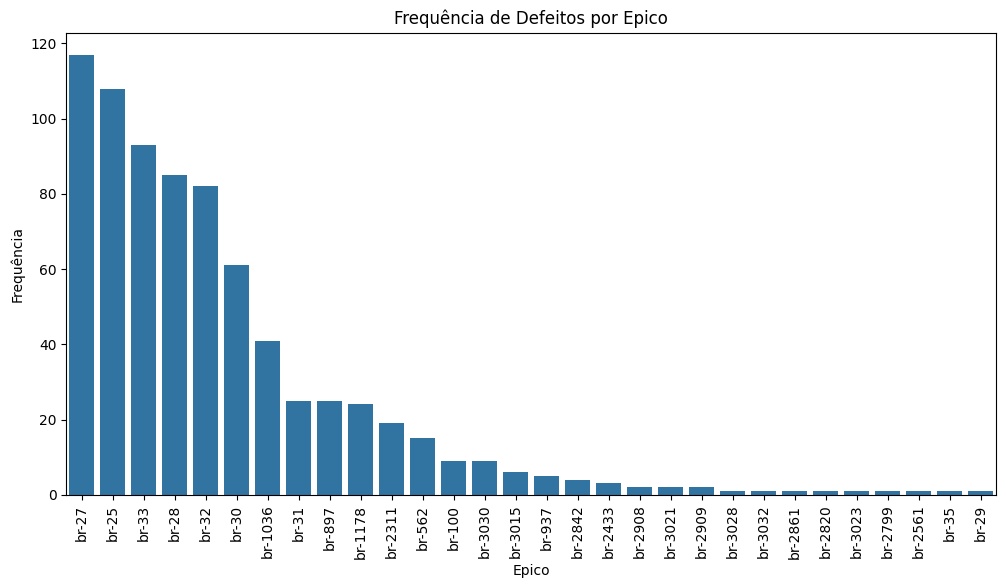

In [46]:
# Gráfico de frequência dos defeitos
plt.figure(figsize=(12, 6))
sns.barplot(x=defeitos_freq.index, y=defeitos_freq.values)
plt.xticks(rotation=90)
plt.xlabel("Epico")
plt.ylabel("Frequência")
plt.title("Frequência de Defeitos por Epico")
plt.show()

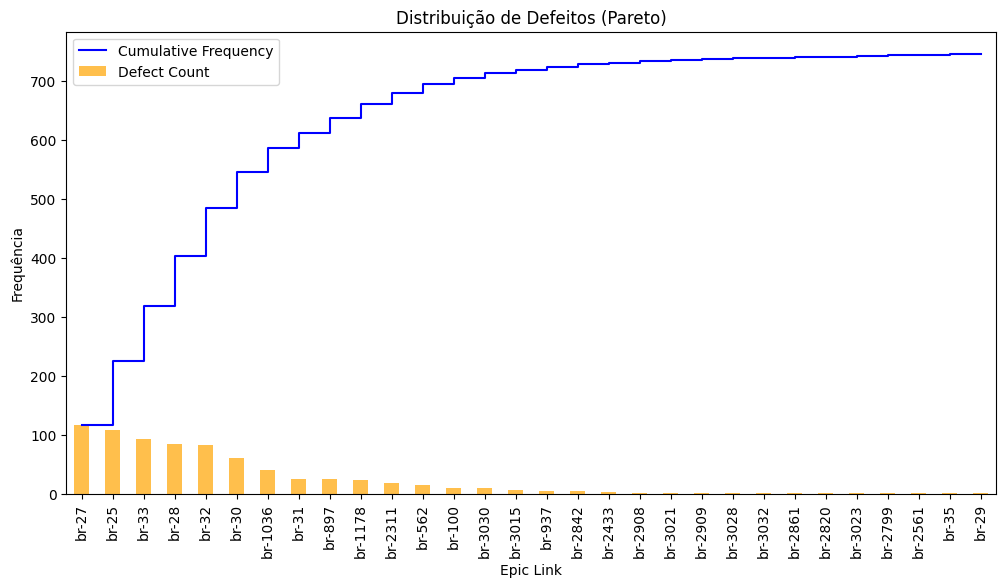

In [47]:
# Gráfico de distribuição de defeitos (Pareto)
plt.figure(figsize=(12, 6))
defeitos_freq.cumsum().plot(drawstyle="steps-post", color="blue", label="Cumulative Frequency")
defeitos_freq.plot(kind="bar", color="orange", alpha=0.7, label="Defect Count")
plt.ylabel("Frequência")
plt.title("Distribuição de Defeitos (Pareto)")
plt.legend()
plt.show()

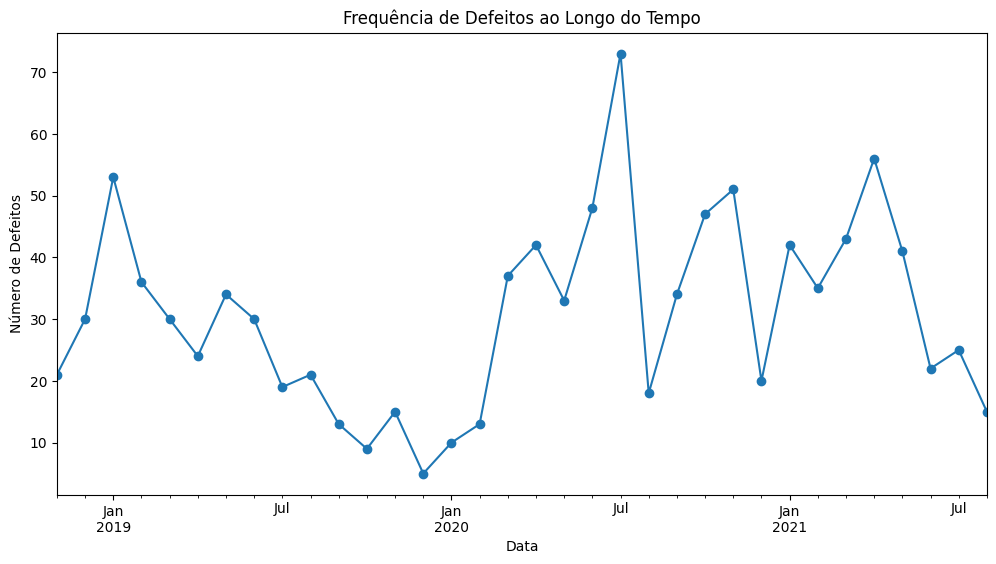

In [48]:
# Resumir o número de defeitos por mês/ano
defeitos_por_mes = df.groupby(df['Created'].dt.to_period("M")).size()
defeitos_por_mes.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel("Data")
plt.ylabel("Número de Defeitos")
plt.title("Frequência de Defeitos ao Longo do Tempo")
plt.show()

In [49]:
# Extrair a versão do sistema (release) da coluna 'Summary' usando regex
df['Release'] = df['Summary'].str.extract(r'\[(v[\d\.]+-[\w\d\.]+)\]')[0]

In [50]:
# Contar o número total de bugs por release
total_bug_counts = df.groupby('Release').size().reset_index(name='Total Bug Count')

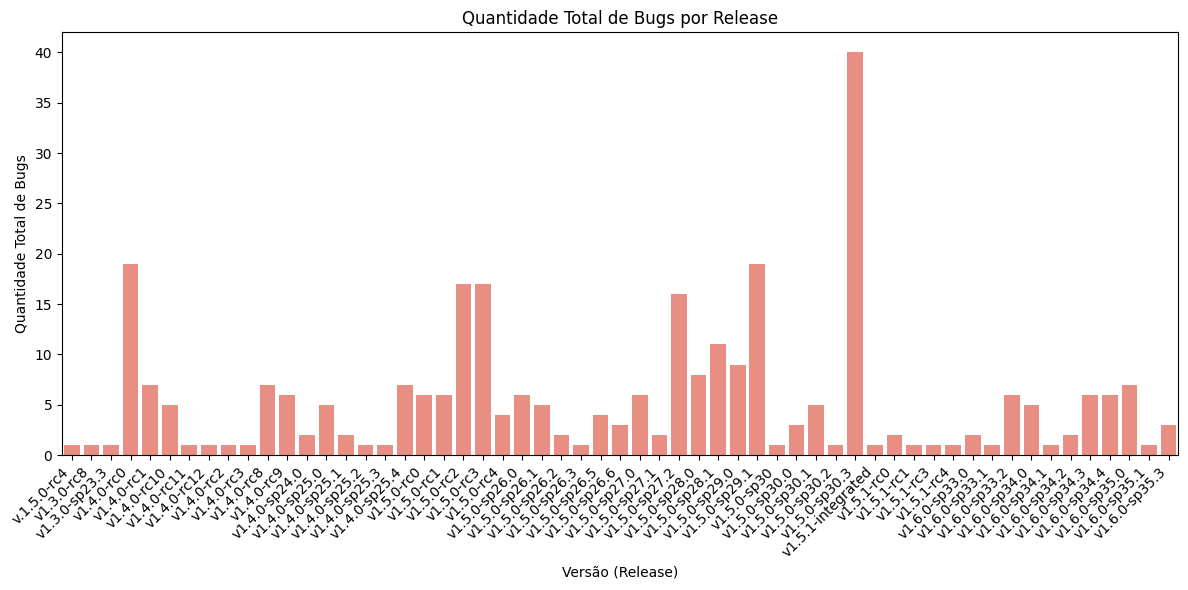

In [51]:
# Gerar gráfico de bugs por release
plt.figure(figsize=(12, 6))
sns.barplot(data=total_bug_counts, x='Release', y='Total Bug Count', color='salmon')
# Ajustes de rótulos e título
plt.xticks(rotation=45, ha='right')
plt.xlabel("Versão (Release)")
plt.ylabel("Quantidade Total de Bugs")
plt.title("Quantidade Total de Bugs por Release")
# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [55]:
# Contar o número de bugs para cada épico, agrupados por release
bug_counts = df.groupby(['Release', 'Epic Link']).size().reset_index(name='Bug Count')

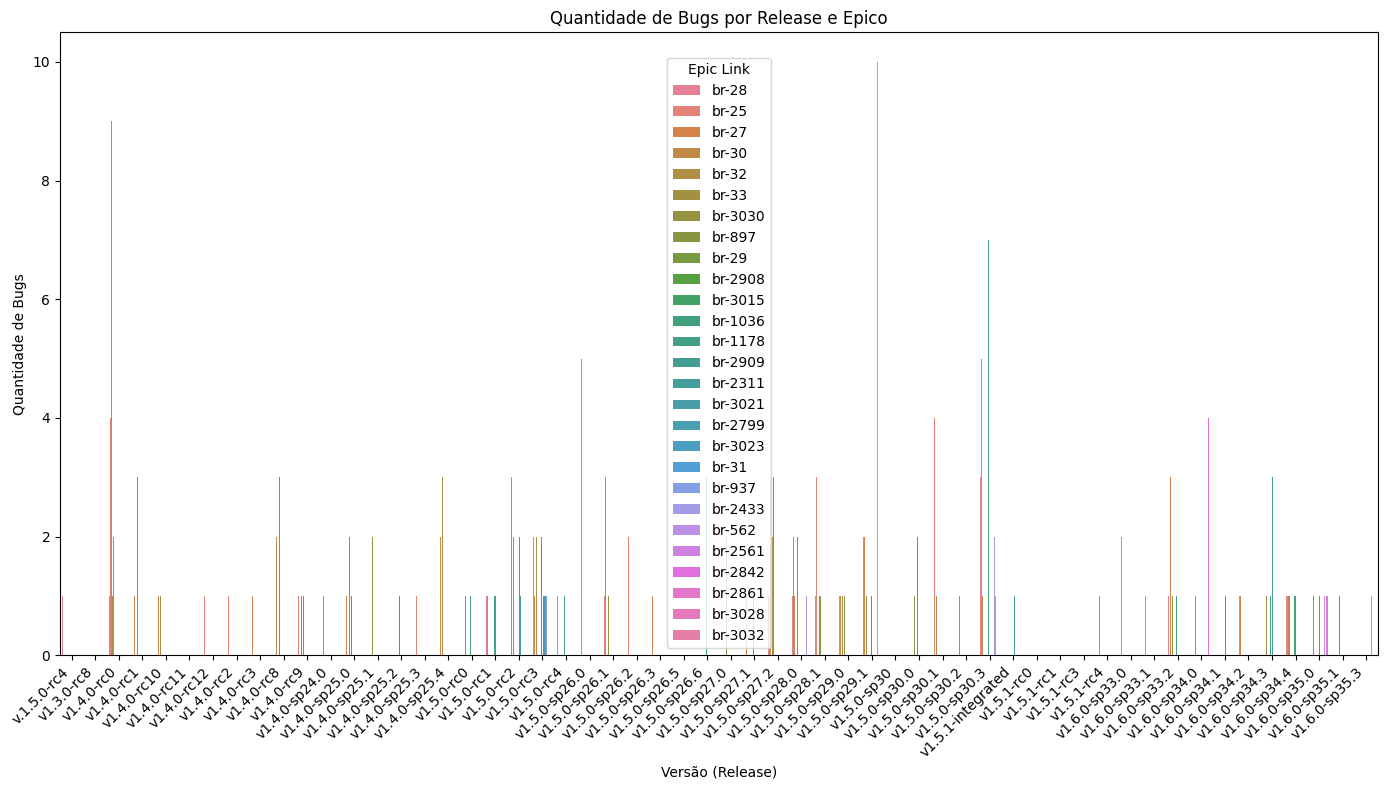

In [56]:
# Gráfico de bugs por release e épico
plt.figure(figsize=(14, 8))
sns.barplot(data=bug_counts, x='Release', y='Bug Count', hue='Epic Link', dodge=True)
# Ajustes de rótulos e título
plt.xticks(rotation=45, ha='right')
plt.xlabel("Versão (Release)")
plt.ylabel("Quantidade de Bugs")
plt.title("Quantidade de Bugs por Release e Epico")
# Mostrar a legenda e o gráfico
plt.legend(title="Epic Link")
plt.tight_layout()
plt.show()